# Importing Libraries

In [1]:
pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 728.4 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 74.5 MB/s eta 0:00:00:00:01
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.16.2
    Uninstalling tensorboard-2.16.2:
      Successfully uninstalled tensorboard-2.16.2
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.16.1
    Uninstalling tensorflow-2.16.1:
      Successfully uninstalled tensorflow-2.16.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.16.0 requires tensorflow<2.17,>=2.16, but you have tensorflow 2.17.0 which is incompatible.
tensorflow-text 2.16.1 requires tensorflow<2.17,>=2.16.1; platform_machine != "arm64" or platform_system != "Darwin", but you have tensorflow 2.17.0 which is incompatible.

[notice] A new release of p

In [2]:
! pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 7.2 MB/s eta 0:00:0000:01

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [3]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 2.5 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns  # Statistical data visualization
import matplotlib.pyplot as plt  # Plotting and visualizations
import matplotlib.patches as mpatches
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier  # k-Nearest Neighbors classifier
from sklearn.neural_network import MLPClassifier  # Multi-layer Perceptron (neural network) classifier
from sklearn.tree import DecisionTreeClassifier  # Decision Tree classifier
from xgboost import XGBClassifier 
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # Ensemble methods: Random Forest and Gradient Boosting
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import warnings
warnings.simplefilter(action='ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
pd.set_option('display.max_columns', 500)

/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv
/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_health_indicators_BRFSS2015.csv
/kaggle/input/diabetes-health-indicators-dataset/diabetes_012_health_indicators_BRFSS2015.csv


# Loading Data

In [5]:
data = pd.read_csv("/kaggle/input/diabetes-health-indicators-dataset/diabetes_012_health_indicators_BRFSS2015.csv")

# Exploratory Data Analysis

In [6]:
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [7]:
r,c = data.shape
print(f"Our Dataset has {r} rows and {c} columns.")

Our Dataset has 253680 rows and 22 columns.


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [9]:
data.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,0.056197,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,0.230302,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [10]:
data.isna().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

## Renaming Columns

#### Some of our columns have odd names, lets rename them so that we can understand each feature better.

In [11]:
data = data.rename(columns={
    'Diabetes_012': 'Target',
    'CholCheck': 'CholCheckLast5Years',
    'HeartDiseaseorAttack': 'HeartDiseaseOrAttack',
    'NoDocbcCost' : 'NoDocBcCost',
    'GenHlth' : 'GeneralHealth',
    'MentHlth' : 'MentalHealth',
    'PhysHlth' : 'PhysicalHealth',
    'DiffWalk' : 'Difficulty_Walking'
})

In [12]:
def convert_float_to_int(value):
    if isinstance(value, float) and value.is_integer():
        return int(value)
    return value
data = data.map(convert_float_to_int)

In [13]:
# 0 -> No Diabetes
# 1 -> Pre - Diabetes
# 2 -> Diabetes
diabetes_mapper = {
    0: "No Diabetes",
    1: "Pre Diabetes",
    2: "Diabetes"
}
data["Target"].value_counts()

Target
0    213703
2     35346
1      4631
Name: count, dtype: int64

In [14]:
data["Target"].value_counts()*100/len(data)

Target
0    84.241170
2    13.933302
1     1.825528
Name: count, dtype: float64

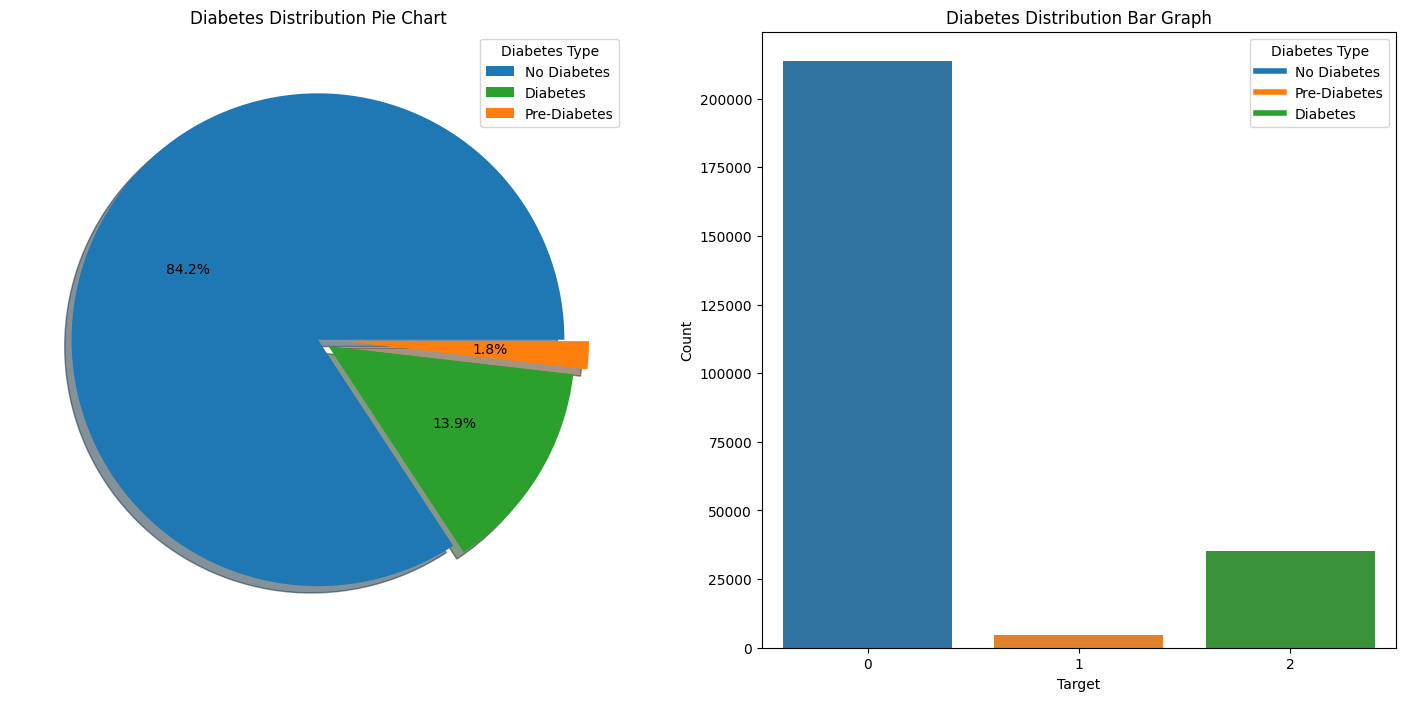

In [15]:
color_mapping = {0: '#1f77b4', 1: '#ff7f0e', 2: '#2ca02c'}
value_labels = {0: 'No Diabetes', 1: 'Pre-Diabetes', 2: 'Diabetes'}

categories = sorted(color_mapping.keys())
colors = [color_mapping[cat] for cat in categories]

f, ax = plt.subplots(1, 2, figsize=(18, 8))

pie_patches, _, _ = ax[0].pie(
    data['Target'].value_counts(),
    explode=[0, 0.05, 0.1],
    autopct="%1.1f%%",
    shadow=True,
    colors=[color_mapping[cat] for cat in data['Target'].value_counts().index]
)
ax[0].set_title('Diabetes Distribution Pie Chart')
ax[0].set_ylabel('')

ax[0].legend(
    handles=pie_patches,
    labels=[value_labels[cat] for cat in data['Target'].value_counts().index],
    title='Diabetes Type',
    loc='best'
)

sns.countplot(x='Target', data=data, ax=ax[1], hue = 'Target', palette=color_mapping)
ax[1].set_title('Diabetes Distribution Bar Graph')
ax[1].set_ylabel('Count')

handles = [plt.Line2D([0], [0], color=color_mapping[cat], lw=4) for cat in categories]
labels = [value_labels[cat] for cat in categories]
ax[1].legend(handles=handles, labels=labels, title='Diabetes Type', loc='best')

plt.show()

#### According to our graph, 84.2% of individuals in our dataset do not have diabetes, 13.9% have diabetes, and 1.8% are pre-diabetic.

## Demographic Analysis (Age, Gender, Income)

### Age

In [16]:
def map_age_code_to_category(age_code):
    age_category_mapping = {
        1: '18-24',
        2: '25-29',
        3: '30-34',
        4: '35-39',
        5: '40-44',
        6: '45-49',
        7: '50-54',
        8: '55-59',
        9: '60-64',
        10: '65-69',
        11: '70-74',
        12: '75-79',
        13: '80 or older'
    }
    return age_category_mapping.get(age_code, 'Unknown Age Group')

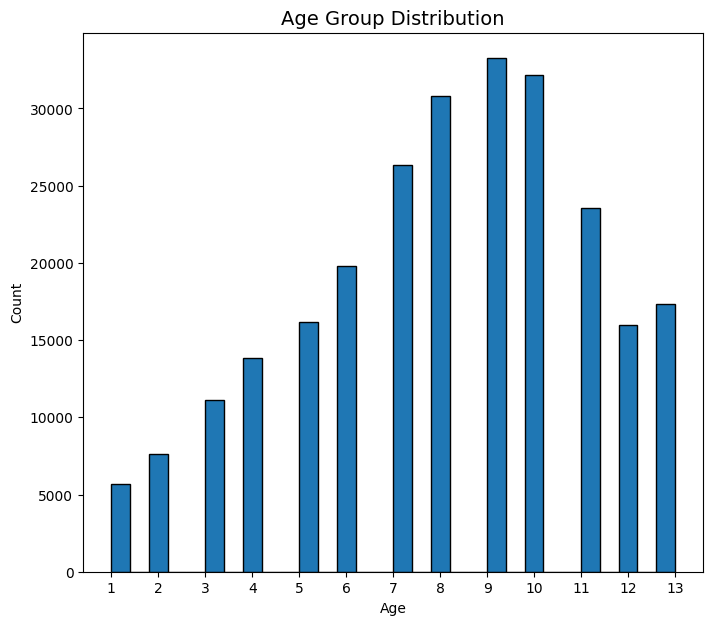

In [17]:
plt.figure(figsize=(8,7))
plt.xlabel('Age', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(ticks=range(int(data['Age'].min()), int(data['Age'].max()) + 1, 1))
plt.title('Age Group Distribution', fontsize=14)
plt.hist(data['Age'], bins=30, edgecolor='black')
plt.show()

In [18]:
age_group_value_counts =  data['Age'].value_counts()
least_freq_age_range = map_age_code_to_category(age_group_value_counts[age_group_value_counts ==  age_group_value_counts.min()].index[0])
most_freq_age_range = map_age_code_to_category(age_group_value_counts[age_group_value_counts ==  age_group_value_counts.max()].index[0])
print(f"The most frequent age group is {most_freq_age_range} and the least frequent age group is {least_freq_age_range}.")

The most frequent age group is 60-64 and the least frequent age group is 18-24.


In [19]:
# Count the occurrences of each Target type within each AgeGroup
age_group_counts = data.groupby(['Age', 'Target']).size().unstack(fill_value=0)
age_group_counts

Target,0,1,2
Age,,,
1,5601,21,78
2,7404,54,140
3,10737,72,314
4,13055,142,626
5,14943,163,1051
6,17765,312,1742
7,22808,418,3088
8,26019,550,4263
9,26809,702,5733


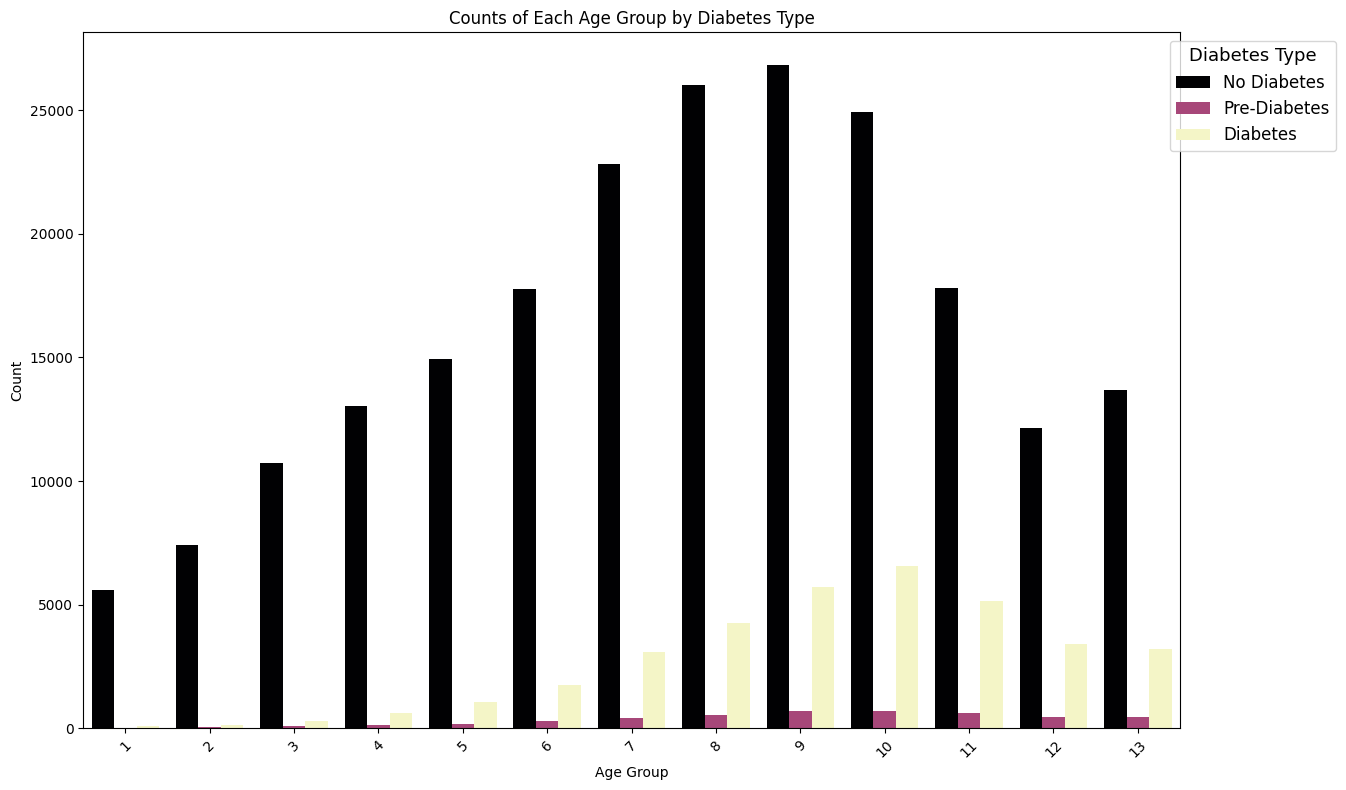

In [20]:
age_group_counts = data.groupby(['Age', 'Target']).size().unstack(fill_value=0).reset_index()

plt.figure(figsize=(12, 8))
ax = sns.barplot(data=age_group_counts.melt(id_vars=['Age'], var_name='DiabetesType', value_name='Count'),
            x='Age', y='Count', hue='DiabetesType', palette='magma')

plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Counts of Each Age Group by Diabetes Type')
plt.xticks(rotation=45)
plt.legend(title='Legend')
plt.tight_layout()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=['No Diabetes', 'Pre-Diabetes', 'Diabetes'], title='Diabetes Type',
          loc='upper right', bbox_to_anchor=(1.15, 1), fontsize='large', title_fontsize='13')

plt.show()

#### We can see that the 9.0 age group (60 - 64) has the most people with No Diabetes and Pre Diabetes, while age group 10 (65 - 69) has the most people with diabetes.

### Gender

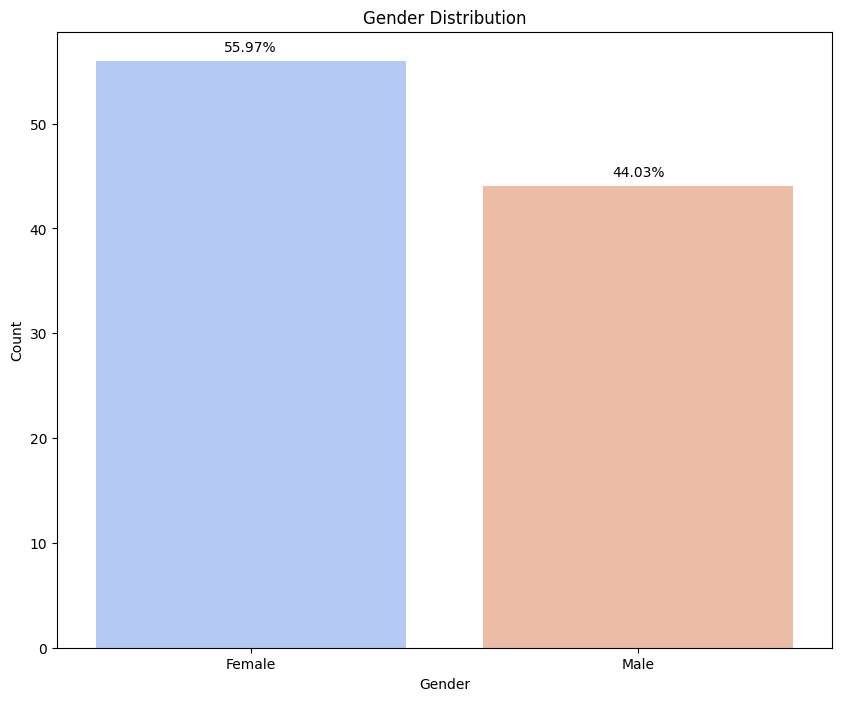

In [21]:
gender_mapper = {
    0 : "Female",
    1 : "Male"
}

gender_distribution = data['Sex'].value_counts(normalize=True) * 100
gender_distribution_df = gender_distribution.reset_index()
gender_distribution_df.columns = ['Gender', 'Percentage']
gender_distribution_df['Gender'] = gender_distribution_df['Gender'].map(gender_mapper)

plt.figure(figsize=(10, 8))
ax = sns.barplot(x='Gender', y='Percentage', data=gender_distribution_df, palette='coolwarm')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

#### 55.97% of our dataset is composed of females and 44.03 is composed of males.

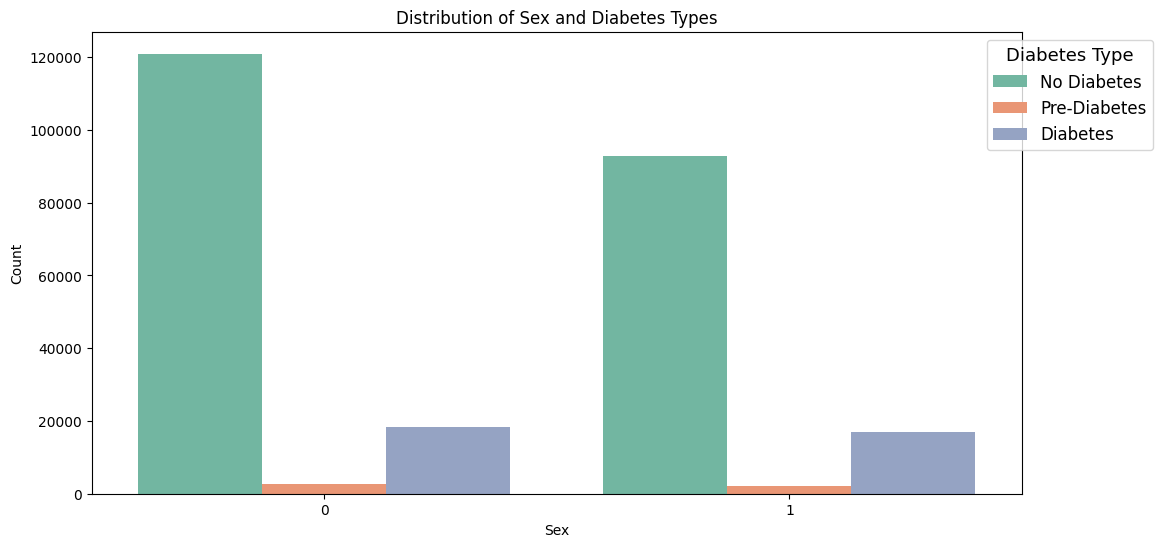

In [22]:
plt.figure(figsize=(12, 6))

ax = sns.countplot(data=data, x='Sex', hue='Target', palette='Set2')

plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex and Diabetes Types')
plt.legend(title='Diabetes Type')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=['No Diabetes', 'Pre-Diabetes', 'Diabetes'], title='Diabetes Type',
          loc='upper right', bbox_to_anchor=(1.15, 1), fontsize='large', title_fontsize='13')

plt.show()

#### Although there are more females than males in our dataset, we should note that our target values are simillary distrubuted accross both genders

### Income Levels

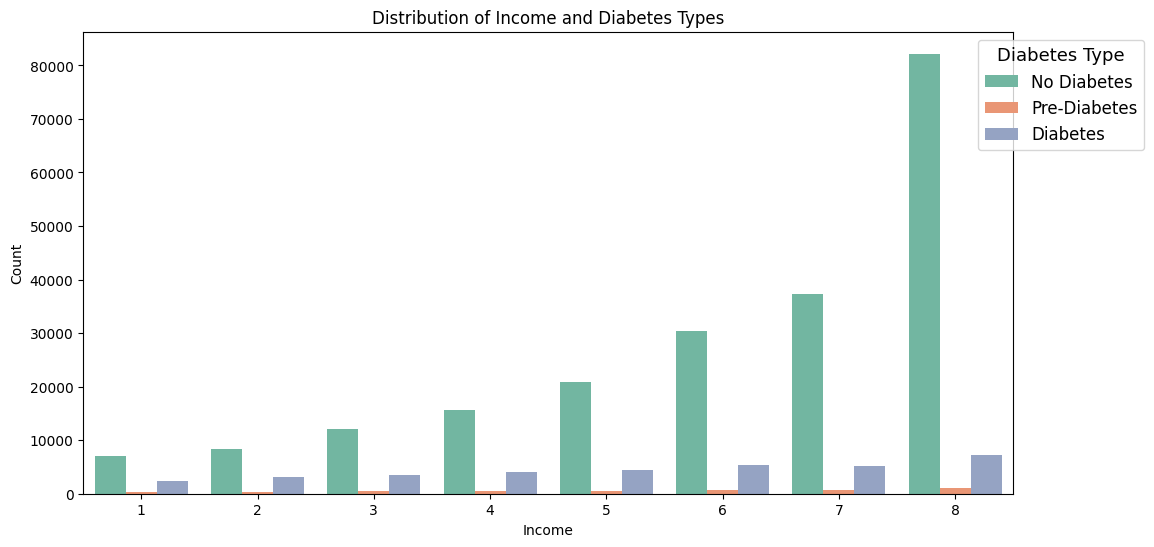

In [23]:
plt.figure(figsize=(12, 6))

ax = sns.countplot(data=data, x='Income', hue='Target', palette='Set2')

plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Distribution of Income and Diabetes Types')
plt.legend(title='Diabetes Type')
handles, labels = ax.get_legend_handles_labels()

ax.legend(handles=handles, labels=['No Diabetes', 'Pre-Diabetes', 'Diabetes'], title='Diabetes Type',
          loc='upper right', bbox_to_anchor=(1.15, 1), fontsize='large', title_fontsize='13')

plt.show()

## Health Conditons

### What percentage of people with each diabetes status have high blood pressure?

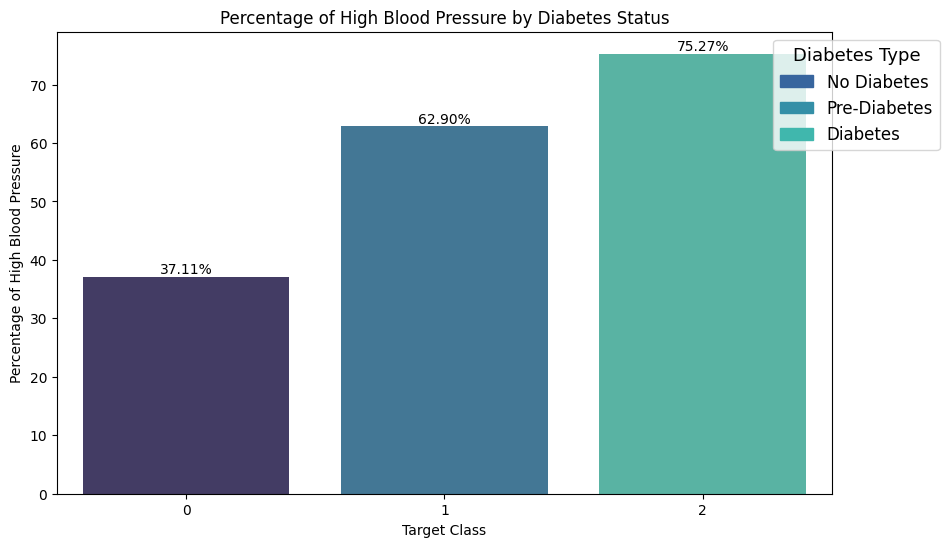

In [24]:
highbp_percentage = data.groupby('Target')['HighBP'].mean() * 100
highbp_percentage_df = highbp_percentage.reset_index()
highbp_percentage_df.columns = ['Target', 'HighBPPercentage']

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Target', y='HighBPPercentage', data=highbp_percentage_df, palette='mako')

for p in ax.patches:
    height = p.get_height()
    ax.annotate( f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

legend_handles = [
    mpatches.Patch(color=sns.color_palette('mako')[i+2], label=label)
    for i, label in enumerate(['No Diabetes', 'Pre-Diabetes', 'Diabetes'])
]

ax.legend(handles=legend_handles, title='Diabetes Type',
          loc='upper right', bbox_to_anchor=(1.15, 1), fontsize='large', title_fontsize='13')

plt.title('Percentage of High Blood Pressure by Diabetes Status')
plt.xlabel('Target Class')
plt.ylabel('Percentage of High Blood Pressure')
plt.show()

#### 75.27% of people with diabetes has high blood pressure, 37.11% of people without diabetes have high blood pressure and 62.90% of people with pre diabetes have high blood pressure.

### How common is high cholesterol among people with different diabetes statuses?

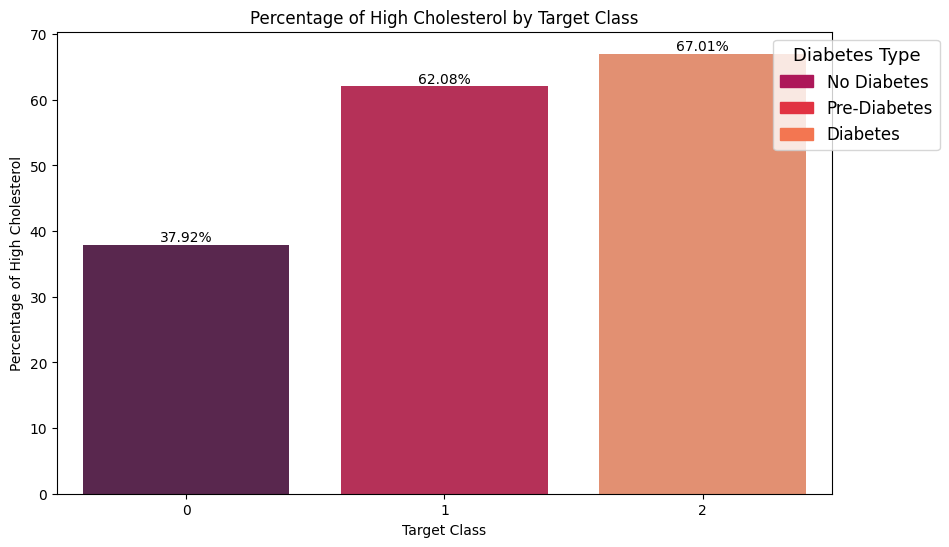

In [25]:
high_chol_percentage = data.groupby('Target')['HighChol'].mean() * 100
high_chol_percentage_df = high_chol_percentage.reset_index()
high_chol_percentage_df.columns = ['Target', 'HighCholPercentage']

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Target', y='HighCholPercentage', data=high_chol_percentage_df, palette='rocket')

for p in ax.patches:
    height = p.get_height()
    ax.annotate( f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')


    
legend_handles = [
    mpatches.Patch(color=sns.color_palette('rocket')[i+2], label=label)
    for i, label in enumerate(['No Diabetes', 'Pre-Diabetes', 'Diabetes'])
]

ax.legend(handles=legend_handles, title='Diabetes Type',
          loc='upper right', bbox_to_anchor=(1.15, 1), fontsize='large', title_fontsize='13')
plt.title('Percentage of High Cholesterol by Target Class')
plt.xlabel('Target Class')
plt.ylabel('Percentage of High Cholesterol')
plt.show()

In [26]:
chol_diabetes = data[data['Target'] == 2]['HighChol'].mean() * 100
print(f'Percentage of people with diabetes having high cholesterol: {chol_diabetes}')

Percentage of people with diabetes having high cholesterol: 67.01182594918804


#### Since 67% of people with diabetes also have high cholesterol I'd say that it may be a common factor.

### Is there a relationship between cholesterol checks and diabetes status?

In [27]:
cholcheck_percentage = data.groupby('Target')['CholCheckLast5Years'].mean() * 100
print(cholcheck_percentage)

Target
0    95.710402
1    98.661196
2    99.318169
Name: CholCheckLast5Years, dtype: float64


#### The majority of people within our dataset has had their cholesterol checked within the past 5 years, but since the values are very high it seems that there isn't that strong of a relationship between having your cholesterol checked within the past 5 years and diabetes.

### What is the average BMI for each diabetes status group?

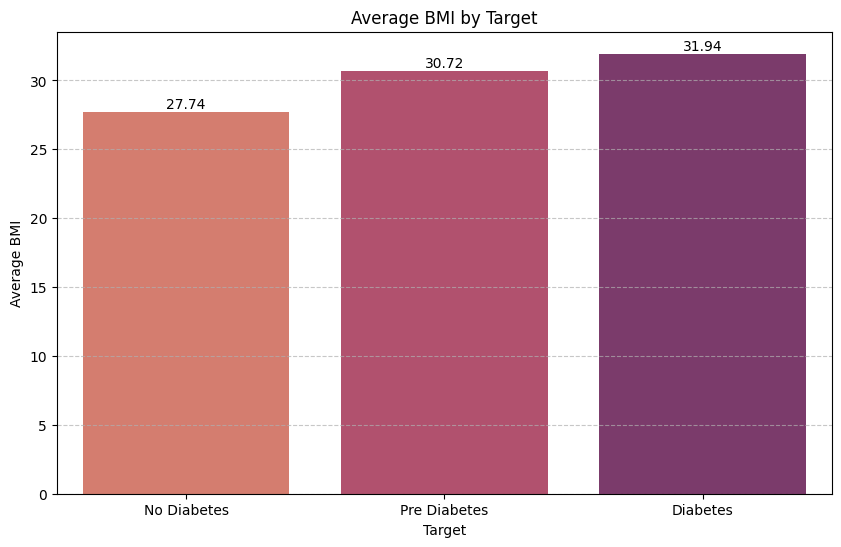

In [28]:
avg_bmi = data.groupby('Target')['BMI'].mean().reset_index()
avg_bmi['Target'] = avg_bmi['Target'].map(diabetes_mapper)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Target', y='BMI', data=avg_bmi, palette='flare')

for p in ax.patches:
    height = p.get_height()
    ax.annotate( f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

plt.title('Average BMI by Target')
plt.xlabel('Target')
plt.ylabel('Average BMI')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Individuals without diabetes have an average BMI of 27.74, whereas those with prediabetes have an average BMI of 30.72. Individuals diagnosed with diabetes have the highest average BMI at 31.94.

### Is BMI a significant factor in diabetes prevalence?

In [29]:
correlation_coefficient, p_value = pearsonr( data['BMI'], data['Target'])

print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient: 0.2243794737583985
P-value: 0.0


#### With the pearson correlation coefficient being 0.224 it shows a weak but meaningful link between BMI and diabetes. This shows that there's a connection between higher BMI and a higher chance of diabetes, the effect isn't very strong.

### Are people with diabetes more likely to have had a stroke or heart attack?

In [30]:
stroke_percentage = data.groupby('Target')['Stroke'].mean() * 100
heart_disease_percentage = data.groupby('Target')['HeartDiseaseOrAttack'].mean() * 100

print(f'Stroke percentage by diabetes status:\n{stroke_percentage}')
print(f'Heart disease percentage by diabetes status:\n{heart_disease_percentage}')

Stroke percentage by diabetes status:
Target
0    3.162801
1    5.722306
2    9.245742
Name: Stroke, dtype: float64
Heart disease percentage by diabetes status:
Target
0     7.183334
1    14.338156
2    22.288236
Name: HeartDiseaseOrAttack, dtype: float64


#### Although individuals with Diabetes have the highest percentage of having previously experienced a stroke or heart attack, the overall percentages are too low to consider these conditions as a strong contributing factor.

## Lifestyle and Health

### What percentage of smokers are in each diabetes status group?

Target
0    42.968044
1    49.276614
2    51.821988
Name: Smoker, dtype: float64


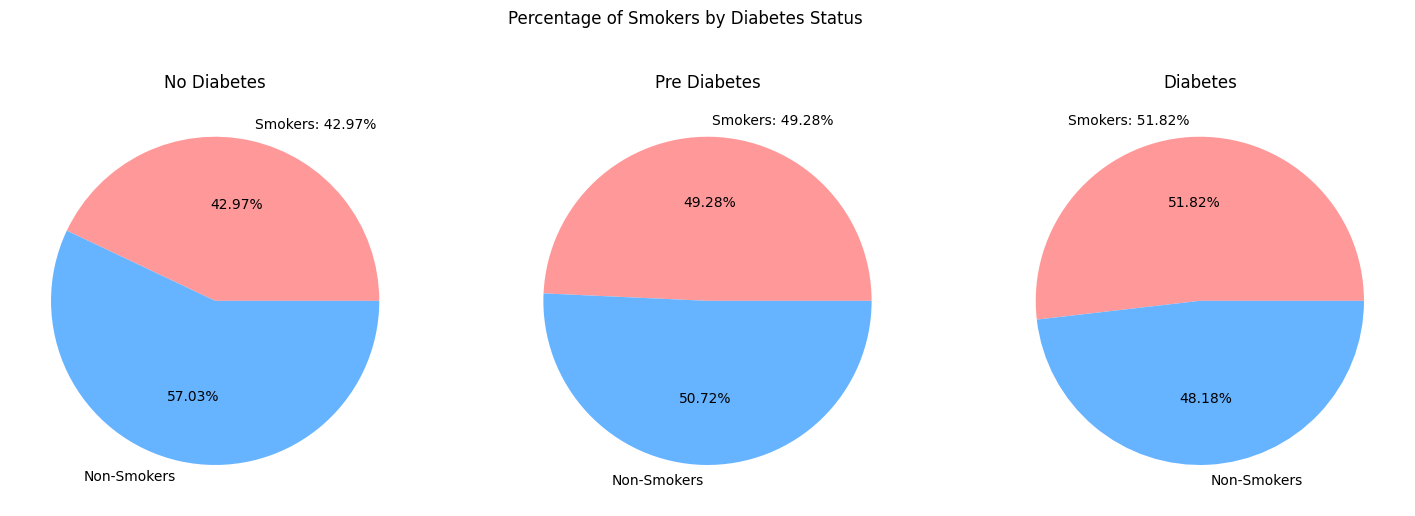

In [31]:
smoker_percentage = data.groupby('Target')['Smoker'].mean() * 100
print(smoker_percentage)

smoker_percentage.index = smoker_percentage.index.map(diabetes_mapper)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, (status, percentage) in enumerate(smoker_percentage.items()):
    axes[i].pie([percentage, 100 - percentage], labels=[f'Smokers: {percentage:.2f}%', 'Non-Smokers'], autopct='%1.2f%%', colors=['#ff9999', '#66b3ff'])
    axes[i].set_title(f'{status}')

plt.suptitle('Percentage of Smokers by Diabetes Status')
plt.show()

#### For Indivudials without diabetes 42.9% of them are smokers. For Pre-Diabetics 49.28% are smokers. And for Diabetics 51.28% of them are smokers.

#### Since the percentages are quite similar accross each target value it appears that smoking is not a strong predictor of developing diabetes.

### What percentage of people with each diabetes status consume alcohol heavily?

Target
0    6.184284
1    4.491471
2    2.353873
Name: HvyAlcoholConsump, dtype: float64


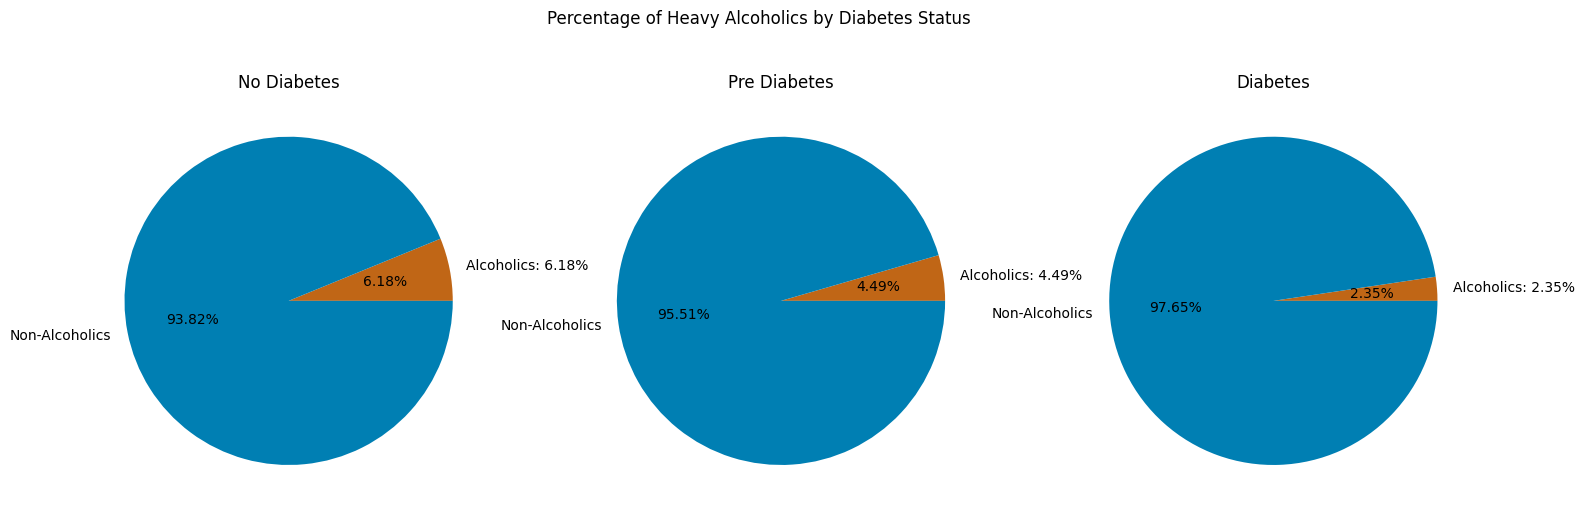

In [32]:
alcohol_percentage = data.groupby('Target')['HvyAlcoholConsump'].mean() * 100
print(alcohol_percentage)
alcohol_percentage.index = alcohol_percentage.index.map(diabetes_mapper)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, (status, percentage) in enumerate(alcohol_percentage.items()):
    axes[i].pie([percentage, 100 - percentage], labels=[f'Alcoholics: {percentage:.2f}%', 'Non-Alcoholics'], autopct='%1.2f%%', colors=['#C06616', '#007FB3'])
    axes[i].set_title(f'{status}')

plt.suptitle('Percentage of Heavy Alcoholics by Diabetes Status')
plt.show()

#### Approximately 6.10% of people without diabetes consume alcohol heavily. While 4.69% of people with pre diabetes consume alcohol heavily. And  2.35% of people with this diabetes consume alcohol heavily.

### Is there a link between fruit and vegetable consumption and diabetes prevalence?

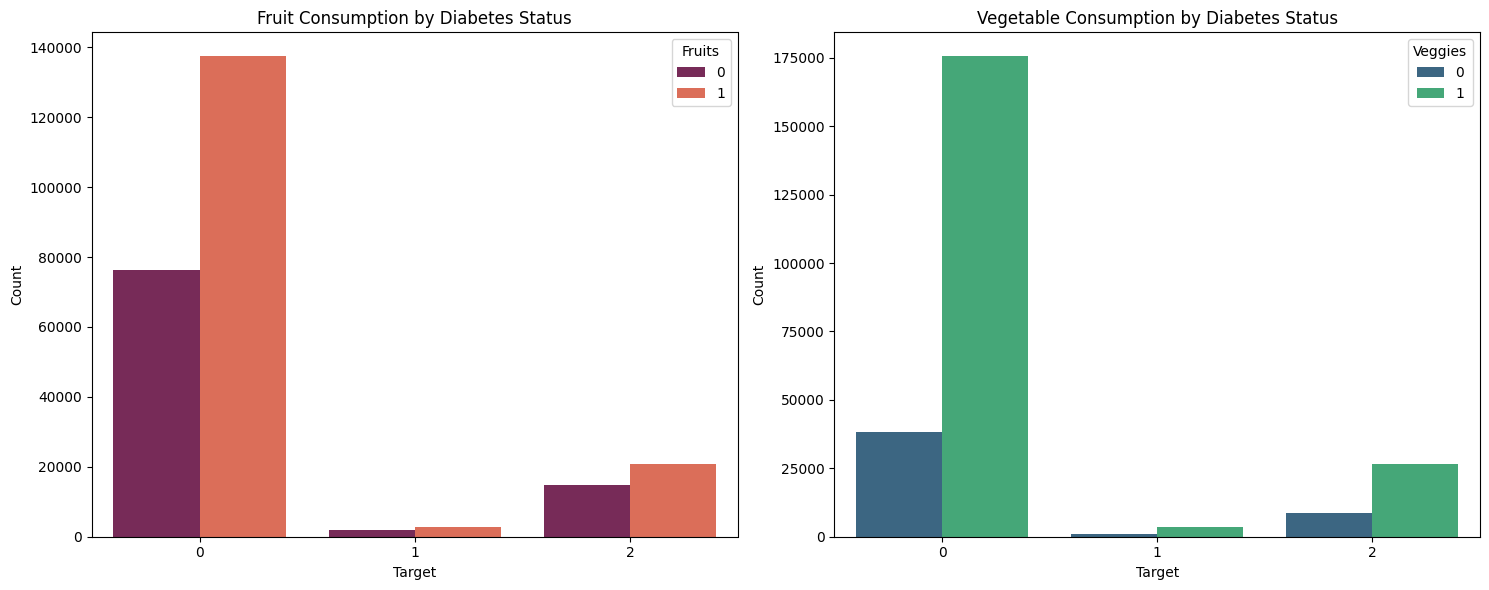

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Fruits 
sns.countplot(data=data, x='Target', hue='Fruits', ax=ax[0], palette='rocket')
ax[0].set_title('Fruit Consumption by Diabetes Status')
ax[0].set_ylabel('Count')

# Vegetables 
sns.countplot(data=data, x='Target', hue='Veggies', ax=ax[1], palette='viridis')
ax[1].set_title('Vegetable Consumption by Diabetes Status')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

#### From the graphs above, it appears that individuals without diabetes tend to consume more fruits and vegetables than those with diabetes. However, this observation might be influenced by the way the data was collected. Across both graphs, the data shows a similar distribution, but with noticeable differences in fruit and vegetable consumption among different diabetes statuses. This discrepancy could be due to the fact that fruits are generally perceived as more enjoyable to eat compared to vegetables.

### Are people with diabetes more likely to report cost barriers to seeing a doctor?

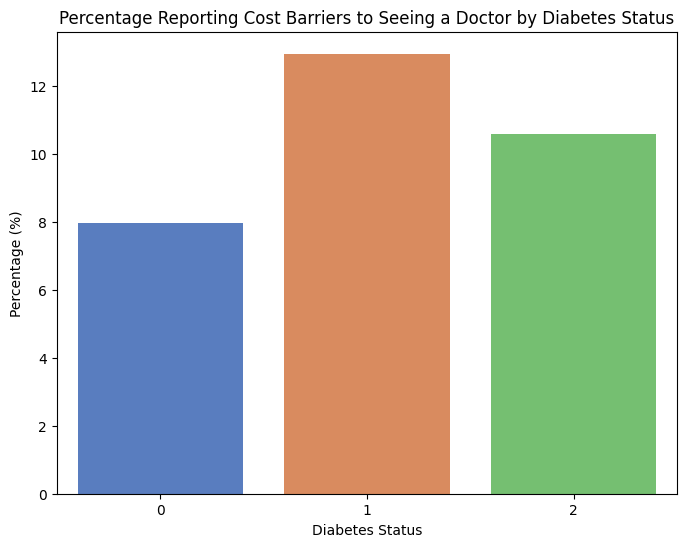

Target
0     7.961049
1    12.934571
2    10.586771
Name: NoDocBcCost, dtype: float64


In [34]:
cost_barriers_percentage = data.groupby('Target')['NoDocBcCost'].mean() * 100

plt.figure(figsize=(8, 6))
sns.barplot(x=cost_barriers_percentage.index, y=cost_barriers_percentage.values, palette='muted')
plt.xlabel('Diabetes Status')
plt.ylabel('Percentage (%)')
plt.title('Percentage Reporting Cost Barriers to Seeing a Doctor by Diabetes Status')
plt.show()

print(cost_barriers_percentage)

#### No, people with diabetes are not more likely to report cost barriers to seeing a doctor compared to those with no diabetes or pre-diabetes. And with the low percentags it seems that this may not be a strong factor at all

#### From the graph above it seems that

### Are poorer general health ratings associated with diabetes?

In [35]:
summary_stats = data.groupby('Target')['GeneralHealth'].agg(['mean', 'median', 'std', 'min', 'max'])
print(summary_stats)

            mean  median       std  min  max
Target                                      
0       2.372391     2.0  1.019367    1    5
1       2.975599     3.0  1.027930    1    5
2       3.290981     3.0  1.009928    1    5


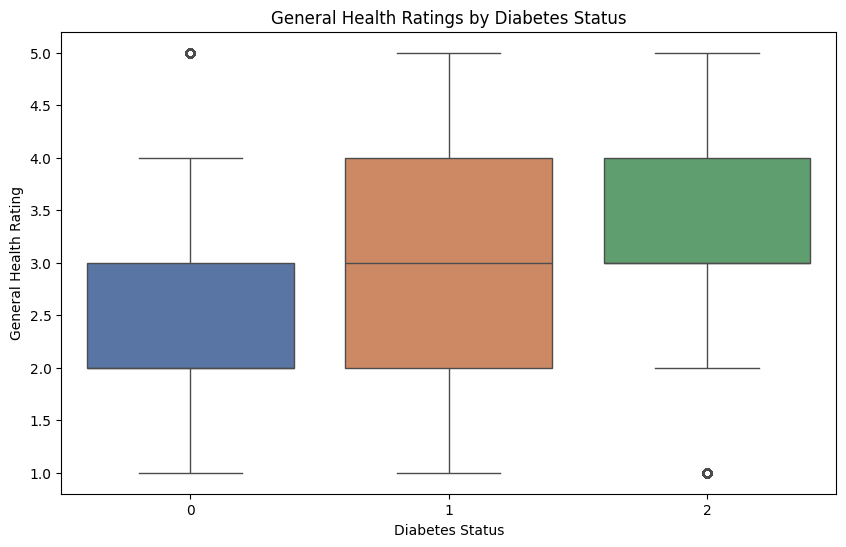

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y='GeneralHealth', data=data, palette='deep')
plt.xlabel('Diabetes Status')
plt.ylabel('General Health Rating')
plt.title('General Health Ratings by Diabetes Status')
plt.show()

#### Yes it seems that individuals with diabetes report poorer health ratings when compared to non diabetic and pre-diabetic individuals

### What percentage of people with each diabetes status report difficulty walking?

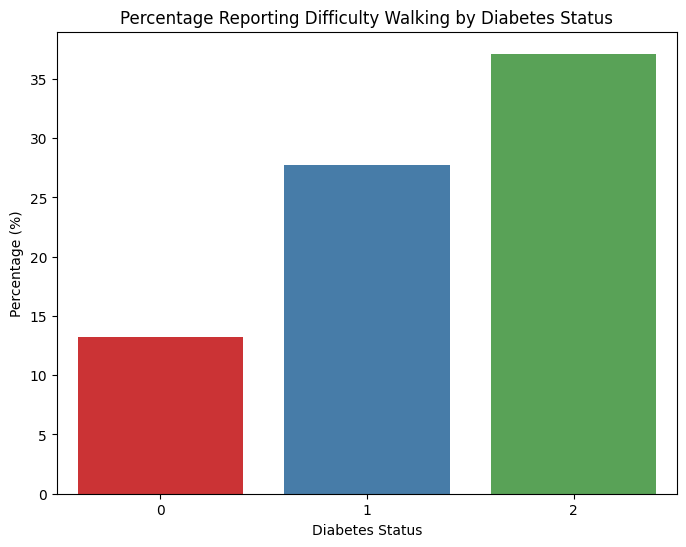

Target
0    13.228172
1    27.747787
2    37.121598
Name: Difficulty_Walking, dtype: float64


In [37]:
difficulty_walking_percentage = data.groupby('Target')['Difficulty_Walking'].mean() * 100

plt.figure(figsize=(8, 6))
sns.barplot(x=difficulty_walking_percentage.index, y=difficulty_walking_percentage.values, palette='Set1')
plt.xlabel('Diabetes Status')
plt.ylabel('Percentage (%)')
plt.title('Percentage Reporting Difficulty Walking by Diabetes Status')
plt.show()

print(difficulty_walking_percentage)

### The graph shows that 13.23% of non-diabetics report difficulty walking, compared to 22.75% of pre-diabetics and 37.12% of diabetics.
### This indicates that individuals with diabetes are more likely to report difficulty walking compared to those without diabetes. This decline in physical health could be a strong factor on whether or not someone has this disease.

# Feature Engineering

In [38]:
## High blood pressure and high cholesterol often go together and can increase the risk of diabetes. This feature might help the model understand the combined effect of both conditions.
data['HighBP_And_HighChol'] = data['HighBP'] * data['HighChol']

In [39]:
## Having several chronic conditions can greatly increase the risk of diabetes. This feature could help the model understand how multiple conditions together affect diabetes risk.
data['ChronicConditions'] = data['HighBP'] + data['HighChol'] + data['Stroke'] + data['HeartDiseaseOrAttack']

In [40]:
## Can help capture non-linear relationships between BMI and diabetes risk.
data['BMI_Squared'] = data['BMI'] ** 2
data['BMI_Cubed'] = data['BMI'] ** 3

In [41]:
## By aggregating multiple risk factors into a single feature, we can provide a more comprehensive measure of diabetes risk.

data['DiabetesRiskScore'] = data['HighBP'] + data['HighChol'] + (data['BMI'] >= 30)

In [42]:
## Education and income can both influence health behaviors and access to healthcare. 
## This feature could help the model understand how the combination of education and income affects diabetes risk.
data['Education_Income'] = data['Education'] * data['Income']
data['Income_HealthcareAccess'] = data['Income'] * data['AnyHealthcare']

In [43]:
data.corr()

,Target,HighBP,HighChol,CholCheckLast5Years,BMI,Smoker,Stroke,HeartDiseaseOrAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocBcCost,GeneralHealth,MentalHealth,PhysicalHealth,Difficulty_Walking,Sex,Age,Education,Income,HighBP_And_HighChol,ChronicConditions,BMI_Squared,BMI_Cubed,DiabetesRiskScore,Education_Income,Income_HealthcareAccess
Target,1.000000,0.271596,0.209085,0.067546,0.224379,0.062914,0.107179,0.180272,-0.121947,-0.042192,-0.058972,-0.057882,0.015410,0.035436,0.302587,0.073507,0.176287,0.224239,0.031040,0.185026,-0.130517,-0.171483,0.275279,0.321549,0.193296,0.141587,0.335828,-0.177801,-0.137796
HighBP,0.271596,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.209361,-0.125267,-0.040555,-0.061266,-0.003972,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235,0.674765,0.752408,0.176905,0.124029,0.737199,-0.184937,-0.127252
HighChol,0.209085,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.180765,-0.078046,-0.040859,-0.039874,-0.011543,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459,0.681530,0.735738,0.082585,0.053970,0.687406,-0.091062,-0.052129
CholCheckLast5Years,0.067546,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.044206,0.004190,0.023849,0.006121,-0.023730,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259,0.079627,0.112247,0.028112,0.019670,0.104690,0.014895,0.061473
BMI,0.224379,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.052904,-0.147294,-0.087518,-0.062275,-0.048736,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069,0.153410,0.183671,0.964919,0.849227,0.511573,-0.120346,-0.091452
Smoker,0.062914,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.114441,-0.087401,-0.077666,-0.030678,0.101619,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.161955,-0.123937,0.096793,0.143068,0.009223,0.003875,0.101719,-0.166880,-0.114712
Stroke,0.107179,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.203002,-0.069151,-0.013389,-0.041124,-0.016950,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,-0.076009,-0.128599,0.129688,0.378249,0.017646,0.012922,0.119436,-0.124244,-0.104264
HeartDiseaseOrAttack,0.180272,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,1.000000,-0.087299,-0.019790,-0.039167,-0.028991,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,-0.099600,-0.141011,0.234552,0.541938,0.042887,0.028831,0.217813,-0.144067,-0.110607
PhysActivity,-0.121947,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.087299,1.000000,0.142756,0.153150,0.012392,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.199658,0.198539,-0.108842,-0.144194,-0.133102,-0.103333,-0.164103,0.231557,0.181885
Fruits,-0.042192,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.019790,0.142756,1.000000,0.254342,-0.035288,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.110187,0.079929,-0.042199,-0.050249,-0.075306,-0.056039,-0.079103,0.106133,0.079129


# Data Preprocessing

## We're going to remove the pre-diabetes target as we only want to predict of a person had diabetes or not

In [44]:
data.shape

(253680, 29)

In [45]:
data = data[data['Target'] != 1]
data['Target'] = data['Target'].replace(2, 1)

In [46]:
data_no_target =  data.drop(columns='Target', axis=1)
X = data_no_target
y = data["Target"]

In [47]:
data.shape

(249049, 29)

# Using SMOTE we will balance our unbalanced dataset

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

df_train_smote = pd.DataFrame(X_train_smote, columns=X_train.columns)
df_train_smote['Target'] = y_train_smote

df_test = pd.DataFrame(X_test, columns=X_test.columns)
df_test['Target'] = y_test

df_updated = pd.concat([df_train_smote, df_test], ignore_index=True)

print("Updated Dataset Shape:", df_updated.shape)
data = df_updated

Updated Dataset Shape: (391662, 29)


In [49]:
data["Target"].value_counts()*100/len(data)

Target
0    54.563118
1    45.436882
Name: count, dtype: float64

In [50]:
data_no_target =  data.drop(columns='Target', axis=1)
X = data_no_target
y = data["Target"]

In [51]:
X.head()

,HighBP,HighChol,CholCheckLast5Years,BMI,Smoker,Stroke,HeartDiseaseOrAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocBcCost,GeneralHealth,MentalHealth,PhysicalHealth,Difficulty_Walking,Sex,Age,Education,Income,HighBP_And_HighChol,ChronicConditions,BMI_Squared,BMI_Cubed,DiabetesRiskScore,Education_Income,Income_HealthcareAccess
0,0,0,1,30,0,0,0,0,1,1,0,1,0,2,0,0,0,1,9,5,7,0,0,900,27000,1,35,7
1,0,0,0,29,0,0,0,0,1,1,0,1,0,3,0,0,0,1,7,5,4,0,0,841,24389,0,20,4
2,0,1,1,23,0,0,0,1,1,1,0,1,0,2,0,0,0,0,9,6,8,0,1,529,12167,1,48,8
3,1,1,1,27,0,0,0,1,1,1,0,1,0,1,4,2,0,1,8,6,8,1,2,729,19683,2,48,8
4,1,1,1,24,0,0,1,1,0,0,0,1,0,1,30,3,0,0,9,4,5,1,3,576,13824,2,20,5


In [52]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [53]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Machine Learning Algorithms

# Logistic Regression

In [54]:
log_reg = LogisticRegression(max_iter=1000)  # Increase max_iter as needed
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [55]:
y_pred = log_reg.predict(X_test)

In [56]:
 accuracy_score(y_train, log_reg.predict(X_train))

0.7856183117426092

In [57]:
log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))

In [58]:
confusion_matrix(y_test, y_pred)

array([[35550,  7388],
       [ 9157, 26238]])

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81     42938
           1       0.78      0.74      0.76     35395

    accuracy                           0.79     78333
   macro avg       0.79      0.78      0.79     78333
weighted avg       0.79      0.79      0.79     78333



## The linear regression model does a great job delivering good precision, recall, and F1-score. This suggests that it effectively identifies Class ‘0’ instances. For Class ‘1’, the performance is slightly lower but still good. With an overall accuracy of 79%, the model demonstrates solid overall performance. However, the uneven results between the classes highlight some areas for improvement

# K-Nearest Neighbors (KNN)

In [60]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

knn_acc = accuracy_score(y_test, knn.predict(X_test))
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

Training Accuracy: 0.8586
Test Accuracy: 0.7995
Confusion Matrix:
[[33377  9561]
 [ 6141 29254]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81     42938
           1       0.75      0.83      0.79     35395

    accuracy                           0.80     78333
   macro avg       0.80      0.80      0.80     78333
weighted avg       0.80      0.80      0.80     78333



## The K-Nearest Neighbors model does a good job with ‘No Diabetes’ (Class 0), with a high precision, recall, and F1-score. However, it has a harder time with ‘Diabetes’ (Class 1), where these metrics are slightly lower. Overall, the model’s accuracy is 80%, which is pretty good. But since it performs unevenly across classes, especially with ‘Diabetes’, there’s still room for improvement.

# Neural Networks

In [61]:
import tensorflow as tf

# List available GPUs
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("GPUs available")
else:
    print("No GPUs available, running on CPU")


2024-09-10 05:26:02.671446: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-10 05:26:02.689291: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-10 05:26:02.694665: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


No GPUs available, running on CPU


In [62]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

nn_model = Sequential([
    Input(shape=(X_train.shape[1],)), 
    Dense(units=64, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = nn_model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)

loss, accuracy = nn_model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')
nn_acc = accuracy
predictions = nn_model.predict(X_test)
predictions = (predictions > 0.5).astype(int) 


Epoch 1/15
7834/7834 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.7744 - loss: 0.4598 - val_accuracy: 0.7985 - val_loss: 0.4183
Epoch 2/15
7834/7834 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.7990 - loss: 0.4132 - val_accuracy: 0.8008 - val_loss: 0.4066
Epoch 3/15
7834/7834 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.8043 - loss: 0.4013 - val_accuracy: 0.8051 - val_loss: 0.3994
Epoch 4/15
7834/7834 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.8080 - loss: 0.3944 - val_accuracy: 0.8083 - val_loss: 0.3936
Epoch 5/15
7834/7834 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.8076 - loss: 0.3946 - val_accuracy: 0.8082 - val_loss: 0.3927
Epoch 6/15
7834/7834 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.8085 - loss: 0.3920 - val_accuracy: 0.8096 - val_loss: 0.3904
Epoch 7/15
7834/7834 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.8099 - loss: 0.3896 - val_accuracy: 0.8102 - val_loss: 0.3891
Epoch 8/15
7834/7834 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.8102 - loss: 0.3895

## A Test Accuracy of 0.81 shows that our model predicts 81% of the test data correctly which is a good sign.

# Decision Tree

In [63]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

y_train_pred = DT.predict(X_train)
y_test_pred = DT.predict(X_test)

print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

Training Accuracy: 0.9886
Test Accuracy: 0.8098
Confusion Matrix:
[[34155  8783]
 [ 6118 29277]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.80      0.82     42938
           1       0.77      0.83      0.80     35395

    accuracy                           0.81     78333
   macro avg       0.81      0.81      0.81     78333
weighted avg       0.81      0.81      0.81     78333



## The decision tree model does a great job with ‘No Diabetes’ (Class 0), showing high precision, recall, and F1-score. However, it has a harder time with ‘Diabetes’ (Class 1), where these metrics are slightly lower. Overall, the model’s accuracy is 81%, which is pretty good. But since it performs unevenly across classes, especially with ‘Diabetes’, there’s still room for improvement.

## Hyperparameter Tuning

In [64]:
grid_param = {
    'criterion': ['gini'],
    'max_depth': [5, 7],
    'splitter': ['best'],
    'min_samples_leaf': [2, 3],
    'min_samples_split': [3, 5],
    'max_features': ['sqrt']
}
grid_search_dt = GridSearchCV(DT, grid_param, cv=50, n_jobs=-1, verbose=1)
grid_search_dt.fit(X_train, y_train)

Fitting 50 folds for each of 8 candidates, totalling 400 fits


GridSearchCV(cv=50, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [5, 7],
                         'max_features': ['sqrt'], 'min_samples_leaf': [2, 3],
                         'min_samples_split': [3, 5], 'splitter': ['best']},
             verbose=1)

In [65]:
grid_search_dt.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'splitter': 'best'}

In [66]:
grid_search_dt.best_score_

0.7288122984066168

In [67]:
DT = grid_search_dt.best_estimator_

y_train_pred = DT.predict(X_train)
y_test_pred = DT.predict(X_test)
dt_acc = accuracy_score(y_test, DT.predict(X_test))
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

Training Accuracy: 0.7349
Test Accuracy: 0.7374
Confusion Matrix:
[[33434  9504]
 [11068 24327]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.78      0.76     42938
           1       0.72      0.69      0.70     35395

    accuracy                           0.74     78333
   macro avg       0.74      0.73      0.73     78333
weighted avg       0.74      0.74      0.74     78333



## Unfortunately hypertuning our parameters made our model even worse

# Random Forest Classifier

In [68]:
rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 15, max_features = 0.75, min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rand_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features=0.75,
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

In [69]:
y_pred = rand_clf.predict(X_test)

In [70]:
y_train_pred = rand_clf.predict(X_train)
y_test_pred = rand_clf.predict(X_test)
rand_acc = accuracy_score(y_test, rand_clf.predict(X_test))
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

Training Accuracy: 0.8496
Test Accuracy: 0.8123
Confusion Matrix:
[[35005  7933]
 [ 6770 28625]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83     42938
           1       0.78      0.81      0.80     35395

    accuracy                           0.81     78333
   macro avg       0.81      0.81      0.81     78333
weighted avg       0.81      0.81      0.81     78333



# Naive Bayes

In [71]:
from sklearn.naive_bayes import GaussianNB

# Initialize the model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
nb_acc = accuracy
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.73
Confusion Matrix:
[[29762 13176]
 [ 7976 27419]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.69      0.74     42938
           1       0.68      0.77      0.72     35395

    accuracy                           0.73     78333
   macro avg       0.73      0.73      0.73     78333
weighted avg       0.74      0.73      0.73     78333



## The Naive Bayes model performs ok for predicting ‘No Diabetes’ (Class 0), with decent precision, recall, and F1-score. However, it is less effective at predicting ‘Diabetes’ (Class 1), where these metrics are lower. With an overall accuracy of 73%, this model falls short compared to previous models. It struggles more with distinguishing between the two classes, particularly for ‘Diabetes’, indicating there is considerable room for improvement.

# Gradient Boosting Classifier (GBC)

In [72]:
# 25 min
gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['log_loss', 'exponential'],  # Updated 'deviance' to 'log_loss'
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv=10, n_jobs=-1, verbose=1)
grid_search_gbc.fit(X_train, y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['log_loss', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [73]:
grid_search_gbc.best_params_

{'learning_rate': 1, 'loss': 'log_loss', 'n_estimators': 200}

In [74]:
grid_search_gbc.best_score_

0.8135921071000416

In [75]:
gbc = GradientBoostingClassifier(learning_rate = 1, loss = 'log_loss', n_estimators = 200)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1, n_estimators=200)

In [76]:
gbc = grid_search_gbc.best_estimator_
y_pred = gbc.predict(X_test)
print(accuracy_score(y_train, gbc.predict(X_train)))
gbc_acc = accuracy_score(y_test, gbc.predict(X_test))
print(accuracy_score(y_test, gbc.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

0.8176836488164198
0.816565176873093
[[36628  6310]
 [ 8059 27336]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84     42938
           1       0.81      0.77      0.79     35395

    accuracy                           0.82     78333
   macro avg       0.82      0.81      0.81     78333
weighted avg       0.82      0.82      0.82     78333



# XGBC Classifier (XGBOOST)

In [77]:
xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 10, n_estimators = 180)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=180, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [78]:
y_pred = xgb.predict(X_test)
print(accuracy_score(y_train, xgb.predict(X_train)))
xgb_acc = accuracy_score(y_test, xgb.predict(X_test))
print(accuracy_score(y_test, xgb.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8009632048102793
0.7941352941927412
[[34858  8080]
 [ 8046 27349]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81     42938
           1       0.77      0.77      0.77     35395

    accuracy                           0.79     78333
   macro avg       0.79      0.79      0.79     78333
weighted avg       0.79      0.79      0.79     78333



# Comparing Models

In [79]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Neural Network', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'Gradient Boosting Classifier', 'XGBoost'],
    'Score': [100*round(log_reg_acc,4), 100*round(knn_acc,4), 100*round(nn_acc,4), 100*round(dt_acc,4), 100*round(rand_acc,4),  100*round(nb_acc,4), 
              100*round(gbc_acc,4), 100*round(xgb_acc,4)]
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
6,Gradient Boosting Classifier,81.66
2,Neural Network,81.23
4,Random Forest,81.23
1,KNN,79.95
7,XGBoost,79.41
0,Logistic Regression,78.88
3,Decision Tree,73.74
5,Naive Bayes,73.00


9792/9792 ━━━━━━━━━━━━━━━━━━━━ 10s 987us/step - accuracy: 0.8135 - loss: 0.3836
2448/2448 ━━━━━━━━━━━━━━━━━━━━ 2s 721us/step


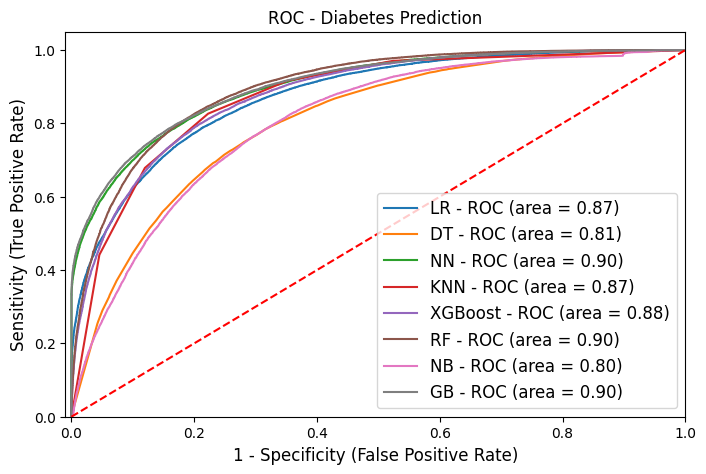

In [80]:
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

models = [
    {'label': 'LR', 'model': log_reg},
    {'label': 'DT', 'model': DT},
    {'label': 'NN', 'model': nn_model},
    {'label': 'KNN', 'model': knn},
    {'label': 'XGBoost', 'model': xgb},
    {'label': 'RF', 'model': rand_clf},
    {'label': 'NB', 'model': nb_model},
    {'label': 'GB', 'model': gbc}
]

for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    
    if hasattr(model, "predict_proba"):
        # For models with predict_proba method
        y_proba = model.predict_proba(X_test)[:,1]
    else:
        # For models without predict_proba method (e.g., Decision Trees, etc.)
        y_proba = model.predict(X_test)  # Assuming it outputs probabilities for binary classification

    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba)
    auc = metrics.roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Diabetes Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.savefig("roc_diabetes.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()


## Neural Network (NN), Random Forest (RF), and Gradient Boosting Decision Tree (GBDT) have the highest AUC values of 0.90, indicating excellent performance.
## XGBoost follows with an AUC of 0.88.
## Logistic Regression (LR) and K-Nearest Neighbor (KNN) both have an AUC of 0.87.
## Decision Tree (DT) has an AUC of 0.81.
## Naive Bayes (NB) has the lowest AUC of 0.80.

9792/9792 ━━━━━━━━━━━━━━━━━━━━ 9s 953us/step - accuracy: 0.8132 - loss: 0.3840
2448/2448 ━━━━━━━━━━━━━━━━━━━━ 2s 728us/step
Accuracy Scores (%): [78.88, 79.95, 81.23, 73.74000000000001, 81.23, 73.0, 81.66, 79.41]
ROC AUC Scores (%): [87.38, 80.77, 90.11, 87.31, 87.88, 89.60000000000001, 80.46, 90.36]


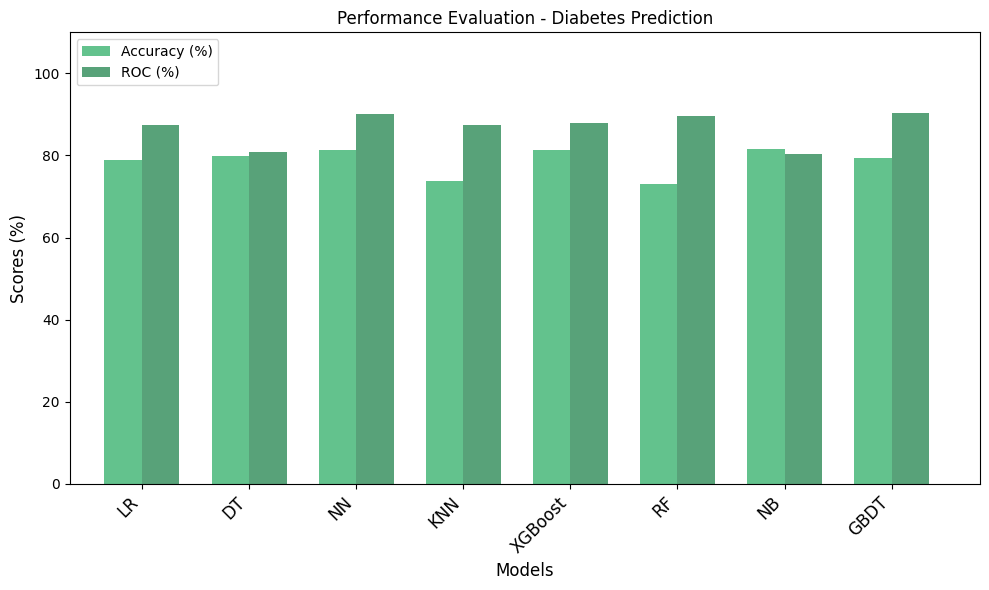

In [81]:

import matplotlib.pyplot as plt
import numpy as np

accuracy_scores = [
    100 * round(log_reg_acc, 4), 
    100 * round(knn_acc, 4), 
    100 * round(nn_acc, 4), 
    100 * round(dt_acc, 4), 
    100 * round(rand_acc, 4),  
    100 * round(nb_acc, 4), 
    100 * round(gbc_acc, 4), 
    100 * round(xgb_acc, 4)
]

roc_scores = []

for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_proba = model.predict(X_test).ravel()
    
    fpr, tpr, _ = metrics.roc_curve(y_test, y_proba)
    auc = metrics.roc_auc_score(y_test, y_proba)
    roc_scores.append(100 * round(auc, 4))

print("Accuracy Scores (%):", accuracy_scores)
print("ROC AUC Scores (%):", roc_scores)

n_models = len(models)
index = np.arange(n_models)
bar_width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = plt.bar(index, accuracy_scores, bar_width, alpha=0.8, color='mediumseagreen', label='Accuracy (%)')

rects2 = plt.bar(index + bar_width, roc_scores, bar_width, alpha=0.8, color='seagreen', label='ROC (%)')

plt.xlim([-0.5, n_models])
plt.ylim([0, 110])
plt.xlabel('Models', fontsize=12)
plt.ylabel('Scores (%)', fontsize=12)
plt.title('Performance Evaluation - Diabetes Prediction', fontsize=12)
plt.xticks(index + bar_width / 2, ['LR', 'DT', 'NN', 'KNN', 'XGBoost', 'RF', 'NB', 'GBDT'], rotation=45, ha='right', fontsize=12)
plt.legend(loc="upper left", fontsize=10)
plt.tight_layout()  # Adjust layout to ensure no label is cut off
plt.savefig("PE_diabetes.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

## Downloading Model

In [82]:
import pickle
model = gbc
pickle.dump(model, open("DiabetesPreictionModel.pkl",'wb'))

In [83]:
gbc_model = pickle.load(open("DiabetesPreictionModel.pkl", "rb"))

In [84]:
gbc_model.predict(X_test)

array([0, 0, 1, ..., 1, 0, 1])

In [85]:
y_prob = gbc_model.predict_proba(X_test)

In [86]:
# For predicting class labels
y_pred = gbc_model.predict(X_test)
print("Predicted class labels:", y_pred)

# For predicting class probabilities
y_prob = gbc_model.predict_proba(X_test)
print("Predicted class probabilities:", y_prob)

Predicted class labels: [0 0 1 ... 1 0 1]
Predicted class probabilities: [[0.95333846 0.04666154]
 [0.99665999 0.00334001]
 [0.00107285 0.99892715]
 ...
 [0.00727363 0.99272637]
 [0.72481138 0.27518862]
 [0.00504921 0.99495079]]


In [87]:
X.head()

,HighBP,HighChol,CholCheckLast5Years,BMI,Smoker,Stroke,HeartDiseaseOrAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocBcCost,GeneralHealth,MentalHealth,PhysicalHealth,Difficulty_Walking,Sex,Age,Education,Income,HighBP_And_HighChol,ChronicConditions,BMI_Squared,BMI_Cubed,DiabetesRiskScore,Education_Income,Income_HealthcareAccess
0,0,0,1,30,0,0,0,0,1,1,0,1,0,2,0,0,0,1,9,5,7,0,0,900,27000,1,35,7
1,0,0,0,29,0,0,0,0,1,1,0,1,0,3,0,0,0,1,7,5,4,0,0,841,24389,0,20,4
2,0,1,1,23,0,0,0,1,1,1,0,1,0,2,0,0,0,0,9,6,8,0,1,529,12167,1,48,8
3,1,1,1,27,0,0,0,1,1,1,0,1,0,1,4,2,0,1,8,6,8,1,2,729,19683,2,48,8
4,1,1,1,24,0,0,1,1,0,0,0,1,0,1,30,3,0,0,9,4,5,1,3,576,13824,2,20,5


In [88]:
X.columns

Index(['HighBP', 'HighChol', 'CholCheckLast5Years', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseOrAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocBcCost', 'GeneralHealth',
       'MentalHealth', 'PhysicalHealth', 'Difficulty_Walking', 'Sex', 'Age',
       'Education', 'Income', 'HighBP_And_HighChol', 'ChronicConditions',
       'BMI_Squared', 'BMI_Cubed', 'DiabetesRiskScore', 'Education_Income',
       'Income_HealthcareAccess'],
      dtype='object')

In [89]:
def predict(features_dict):
    BMI = features_dict.get('BMI', 0)
    HighBP = features_dict.get('HighBP', 0)
    HighChol = features_dict.get('HighChol', 0)
    Stroke = features_dict.get('Stroke', 0)
    HeartDiseaseOrAttack = features_dict.get('HeartDiseaseOrAttack', 0)
    Education = features_dict.get('Education', 0)
    Income = features_dict.get('Income', 0)
    AnyHealthcare = features_dict.get('AnyHealthcare', 0)
    
    HighBP_And_HighChol = HighBP * HighChol
    ChronicConditions = HighBP + HighChol + Stroke + HeartDiseaseOrAttack
    Education_Income = Education * Income
    Income_HealthcareAccess = Income * AnyHealthcare
    
    DiabetesRiskScore = HighBP + HighChol + int(BMI >= 30)
    
    BMI_Squared = BMI ** 2
    BMI_Cubed = BMI ** 3
    
    features = [
        HighBP,
        HighChol,
        features_dict.get('CholCheckLast5Years', 0),
        BMI,
        features_dict.get('Smoker', 0),
        Stroke,
        HeartDiseaseOrAttack,
        features_dict.get('PhysActivity', 0),
        features_dict.get('Fruits', 0),
        features_dict.get('Veggies', 0),
        features_dict.get('HvyAlcoholConsump', 0),
        features_dict.get('AnyHealthcare', 0),
        features_dict.get('NoDocBcCost', 0),
        features_dict.get('GeneralHealth', 0),
        features_dict.get('MentalHealth', 0),
        features_dict.get('PhysicalHealth', 0),
        features_dict.get('Difficulty_Walking', 0),
        features_dict.get('Sex', 0),
        features_dict.get('Age', 0),
        Education,
        Income,
        HighBP_And_HighChol,
        ChronicConditions,
        BMI_Squared,
        BMI_Cubed,
        DiabetesRiskScore,  
        Education_Income, 
        Income_HealthcareAccess  
    ]
    
    features_2d = np.array(features).reshape(1, -1)
    
    features_scaled = scaler.transform(features_2d)
    
    y_pred = gbc_model.predict(features_scaled)
    y_prob = gbc_model.predict_proba(features_scaled)
    
    return y_pred[0], y_prob[0]

In [90]:
diabetes_mapper = {0: "No Diabetes", 1: "Diabetes"}

features_dict = {
    'HighBP': 1,
    'HighChol': 0,
    'CholCheckLast5Years': 1,
    'BMI': 25.4,
    'Smoker': 0,
    'Stroke': 0,
    'HeartDiseaseOrAttack': 1,
    'PhysActivity': 1,
    'Fruits': 1,
    'Veggies': 1,
    'HvyAlcoholConsump': 0,
    'AnyHealthcare': 1,
    'NoDocBcCost': 0,
    'GeneralHealth': 3,
    'MentalHealth': 2,
    'PhysicalHealth': 1,
    'Difficulty_Walking': 0,
    'Sex': 1,
    'Age': 1,
    'Education': 3,
    'Income': 3
}

predicted_label, predicted_probabilities = predict(features_dict)

print("Predicted class label:", diabetes_mapper.get(predicted_label))
print("Predicted class probabilities:", predicted_probabilities)

Predicted class label: No Diabetes
Predicted class probabilities: [0.96868373 0.03131627]
